# Training a perceptron model on the Iris dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import perceptron
import util

In [3]:
iris_db = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_db, header = None, encoding = 'utf-8')

In [4]:
df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

## only select settosa and versicolor
* convert to class label 0 and 1 respectively
* Use two features of sepal & petal length as input

In [5]:
df = df[df[4].isin(['Iris-setosa', 'Iris-versicolor'])]

In [6]:
y = df[4].values
y = np.where(y == 'Iris-setosa', 0, 1)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
X = df.iloc[:,[0,2]].values

In [9]:
X[0:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

### plot data

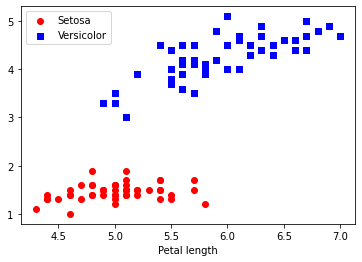

In [10]:
plt.scatter(X[:50,0], X[:50,1],
            color = 'red', marker = 'o', label= 'Setosa'
           )

plt.scatter(X[50:,0], X[50:,1],
            color = 'blue', marker = 's', label= 'Versicolor'
           )
plt.xlabel('Sepal length')
plt.xlabel('Petal length')
plt.legend(loc = 'upper left')
plt.show()

## Train perceptron algorithm on Iris dataset

In [11]:
ppn = perceptron.Perceptron(eta = 0.1, n_iter = 10)

In [12]:
ppn.fit(X,y)

In [13]:
ppn.errors_

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

In [14]:
ppn.w_

array([-0.35375655,  0.91388244])

In [15]:
ppn.b_

-0.2

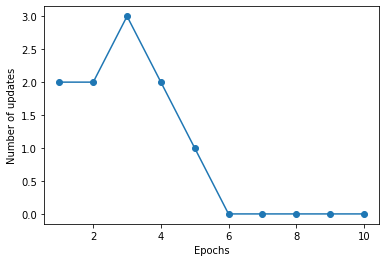

In [16]:
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_ , marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## plot decision region

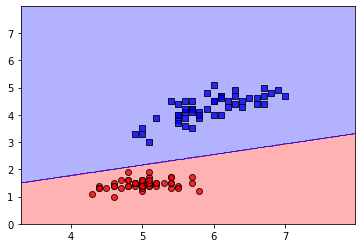

In [17]:
util.plot_decision_regions(X,y, classifier = ppn)